In [ ]:
import numpy as np 
import flexring as flx 
from euclid3 import Vector2
import matplotlib.pyplot as plt
%matplotlib widget
def interpolate_boundary_condition(centre:Vector2,
                                   radius:float,
                                   point1:Vector2,
                                   point2:Vector2,
                                   dydx:float,
                                   ddydx:float,
                                   beta:float,
                                   direction:int):
    # given a chord or a semi chord on a circle, finds the 
    # point along the chord where separation happens
    dr_1 = (point1 - centre).magnitude() - radius
    dr_2 = (point2 - centre).magnitude() - radius
    dr_dtheta_1 = flx.polar_derivative(point= point1 - centre,dy=dydx)
    dr_dtheta_2 = flx.polar_derivative(point= point2- centre,dy= dydx)
    ddr_dtheta_1 = flx.polar_second_derivative(point1 - centre,dydx,ddydx)
    ddr_dtheta_2 = flx.polar_second_derivative(point2 - centre, dydx,ddydx)                                           
    print(f"r1: {dr_1}\nr2: {dr_2}\ndr1:{dr_dtheta_1}\ndr2: {dr_dtheta_1}\nddr1: {ddr_dtheta_1}\nddr2: {ddr_dtheta_2}")
    
    # condition is true when lhs > rhs
    # we calculate lhs and rhs at point1 and point2 and linearly interpolate
    # to find the point where they cross
    lhs_1 = 0.5*ddr_dtheta_1
    lhs_2 = 0.5*ddr_dtheta_2
    rhs_1 = -2*(beta**2)*(direction*dr_dtheta_1/beta + dr_1)
    rhs_2 = -2*(beta**2)*(direction*dr_dtheta_2/beta + dr_2)
    t = (rhs_1 - lhs_1)/((lhs_2-lhs_1)-(rhs_2 - rhs_1))# where rhs == lhs
    return point1 + t*(point2 - point1), t

beta = 3
t = np.linspace(0 , 1 , 100)
radius = 0.35
distance_to_edge = np.linspace(radius - 0.01 , radius-0.1, 100)
angles = np.deg2rad(np.linspace(170, 10, 160))
tyre_centres = [[Vector2(r*np.cos(theta), r*np.sin(theta))for r in distance_to_edge] for theta in angles]
middle = Vector2(1, 0)
left = Vector2(0 , 0)
dydx = (middle.y - left.y)/(middle.x - left.x)
ddydx = -2500
get_rhs = lambda P : -2*(beta**2)*(flx.polar_derivative(P , 0)/beta + P.magnitude()-radius)
is_boundary = lambda tyre_centre, point : (0.5*flx.polar_second_derivative(
    point - tyre_centre, dydx, ddydx)>
        get_rhs(point- tyre_centre))
is_boundary(tyre_centres[0][0], left)
###### 
plt.plot([left.x, middle.x], [left.y , middle.y], marker=".", color= "black")
for t in tyre_centres:
    if(is_boundary(t[0] , left)):
        plt.plot(t[0].x , t[0].y , 'r*')
    else:
        plt.plot(t[0].x , t[0].y , 'g*')
plt.gca().set_aspect("equal")
plt.show()


In [ ]:
import flexring as flx
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from euclid3 import Vector2
%matplotlib widget
road = flx.Road(
                step_width=0.01,
                step_height=0.08,
                step_profile_phase=np.pi
                )

fig,ax =plt.subplots(3 , 1, sharex=True)
ax[0].plot(road.x , road.y , marker=".")
ax[1].plot(road.x, road.dydx, marker=".")
ax[2].plot(road.x , road.ddydx, marker=".")
cum_distance = [(road.points[idx+1] - road.points[idx]).magnitude() for idx in range(len(road.points)-1)]
cum_distance.insert(0 , 0)
cum_distance = np.cumsum(cum_distance)
uniform_distance = np.arange(start=0, stop = cum_distance[-1], step=0.001)
x_interpolator = interpolate.interp1d(x = cum_distance, y = road.x,kind="linear")
y_interpolator = interpolate.interp1d(x = cum_distance, y = road.y , kind="linear")
over_sampled_points = [Vector2(x_interpolator(d) , y_interpolator(d)) for d in uniform_distance]
X = np.array([v.x for v in over_sampled_points])
Y = np.array([v.y for v in over_sampled_points])
ax[0].plot(X , Y , "*")
#plt.xlim((2.49, 2.51))



In [ ]:
a = [1 , 2 , 3 , None, 4 , None]
while True:
    try:
        a.remove(None)
    except:
        break

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib widget
beta = 8
theta = np.linspace(0 , 10, 900)
A = 1
B = 100
deflection = np.exp(-beta*theta)*(A*np.cos(beta*theta) + B*np.sin(beta*theta))*np.cos(theta)
numerical_integral = np.trapz(y=deflection, x = theta)
analytic_integral = beta*(2*(A + B)*beta**2 + A - B)/(4*beta**4+1)
print(f"numerical:\t{numerical_integral:.3f}\nanalytical:\t{analytic_integral:.3f}\n")
plt.plot(theta, deflection)
plt.show()

In [ ]:
# example parser 
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import io
%matplotlib widget
step_x = 490
step_y = 560
point_data = []
with open('../../KerbImpact/tracking_data/tracking.txt') as f:
    while(line:=f.readline()):
        point_data.append(np.array([re.findall(r'\d+', s)[0:3] for s in line.split(';')]))
sorted_points = np.array(np.int32(sorted(point_data, key= lambda p:p[0 , 1])))
sorted_points[: , 0 , 1]
plt.cla()
i = 0
while i < len(sorted_points[0 , : , 0]):
    plt.plot(sorted_points[: , i, 1], -sorted_points[: , i, 2])
    i+=10
plt.plot(step_x , -step_y , "*", markersize=10)
plt.show()

print(sorted_points[0 , 0, 0:10])
# io.savemat("/Users/mahdibabayi/beam_tyre/KerbImpact/tracked_points.mat", 
#            {"frame_num":sorted_points[: , : , 0], "x": sorted_points[: , : , 1], "y":sorted_points[: , : , 2]})
io.savemat("/Users/mahdibabayi/beam_tyre/KerbImpact/tracked_points.mat",
           {"frames": sorted_points})

In [ ]:
import flexring as flx
import numpy as np
import math_utils as mt
import matplotlib
import matplotlib.pyplot as plt
from euclid3 import Vector2
import matplotlib.patches as patches
%matplotlib widget

def get_circle_3points(left:Vector2, middle:Vector2, right:Vector2):
    #takes three points and returns a circle that passes through the three points
    # and a vector connecting the centre of the circle to the middle point
    # if the points are on a straight line (withing tolerance) return 0 for circle radius and 
    # normal to the line for vector 
    chord_right = right - middle
    chord_left = left - middle 
    # find if surface is flat
    if (1 - np.abs(chord_right.dot(chord_left)/(chord_left.magnitude()*chord_right.magnitude()))) < 0.01:
        curvature = 0
        normal = Vector2(-chord_right.y , chord_right.x)
        return curvature , normal
    middle_point_right = middle + chord_right/2
    middle_point_left = middle + chord_left/2
    #lines connecting centre to middle of the chords
    radius_slope_right = Vector2(-chord_right.y , chord_right.x)
    radius_slope_left = Vector2(-chord_left.y , chord_left.x)
    # find intersection
    A = np.array([[chord_right.x , chord_right.y], 
                 [chord_left.x , chord_left.y]])
    b = np.array([middle_point_right.dot(chord_right), middle_point_left.dot(chord_left)])
    centre_x , centre_y = np.linalg.solve(A , b)
    circle_centre = Vector2(centre_x , centre_y)
    curvature = 1/((middle - circle_centre).magnitude())
    normal = (middle - circle_centre).normalized()
    return curvature , normal
def get_circle_tangent_2points(tangent:Vector2,
                               p0:Vector2,
                               p1:Vector2):
    normal = tangent.cross().normalized()
    curvature = 2*(p1-p0).dot(normal)/(p1-p0).magnitude_squared()
    return curvature, normal

    
road = flx.Road(step_width=0.05,
                step_height=0.2,
                high_res=True)
p = road.points
step_section_idx = (np.where(road.dydx > 0))[0]
start_idx = step_section_idx[0]
end_idx = step_section_idx[-1] 
p0 = road.points[end_idx ]
p1 = road.points[start_idx+100]
p2 = road.points[end_idx +100]
#curvature, normal = get_circle_3points(p1, p0 , p2)
curvature, normal = get_circle_tangent_2points(tangent=road.points[end_idx+1] - road.points[end_idx -1],
                                               p0 = p0,
                                               p1 = p1)
if curvature != 0:
    R = 1/curvature
else:
    R = normal.magnitude()
centre = p0 + R * normal
circ  = patches.Circle(centre , R, linewidth=3 , fill=False)

plt.cla()
plt.plot(road.x , road.y)
plt.plot(p0.x , p0.y , "*", markersize=10)
plt.plot(p1.x , p1.y , "x", markersize=10)
plt.plot(p2.x , p2.y , "x", markersize=10)
plt.plot(centre.x , centre.y , "o")
plt.gca().add_patch(circ)
plt.gca().set_aspect('equal')
plt.ylim((centre.y - R*1.5 , centre.y + R*1.5))
plt.xlim((centre.x - R*1.5 , centre.x + R*1.5))
plt.show()


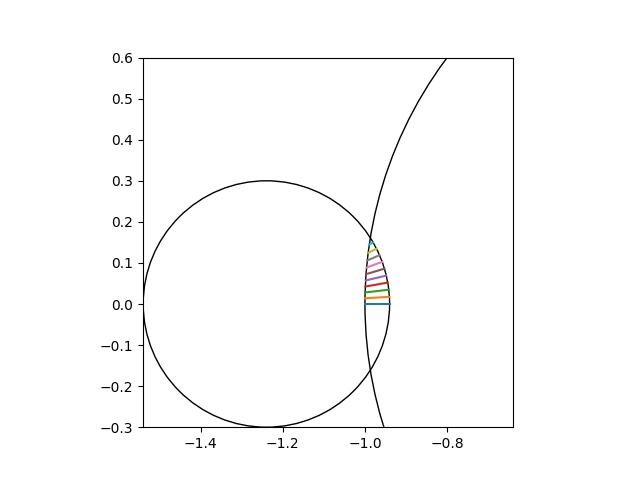

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from euclid3 import Vector2
from matplotlib import patches
%matplotlib widget
terrain_centre = Vector2(0 , 0)
terrain_radius = 1
tyre_radius = 0.3
tyre_centre = Vector2(-terrain_radius - tyre_radius*0.8)
tyre_theta = np.linspace(0, np.deg2rad(30), 10)
get_terrain_angle = lambda theta:np.arcsin(
    (((tyre_centre - terrain_centre).magnitude())/terrain_radius)*np.sin(theta)) - theta
alpha = get_terrain_angle(tyre_theta)
tyre_points = [tyre_centre + tyre_radius*Vector2(np.cos(t) , np.sin(t)) for t in tyre_theta]
deformed_points = [terrain_radius*Vector2(-np.cos(t) , np.sin(t)) for t in alpha]
tyre = patches.Circle(tyre_centre , tyre_radius, fill= False)
terrain = patches.Circle(terrain_centre , terrain_radius, fill=False)
plt.figure()
plt.cla()
plt.gca().add_patch(tyre)
plt.gca().add_patch(terrain)
plt.gca().set_aspect("equal")
plt.xlim((tyre_centre.x - tyre_radius , tyre_centre.x + tyre_radius*2))
plt.ylim((tyre_centre.y - tyre_radius , tyre_centre.y + tyre_radius*2))
[plt.plot([p.x , q.x] , [p.y , q.y]) for p,q in zip(tyre_points, deformed_points)]
plt.show()

__header__
__version__
__globals__
fitted_results
penetration_num
results
terrain_radius_num
tyre_radius
0.055ms per hit



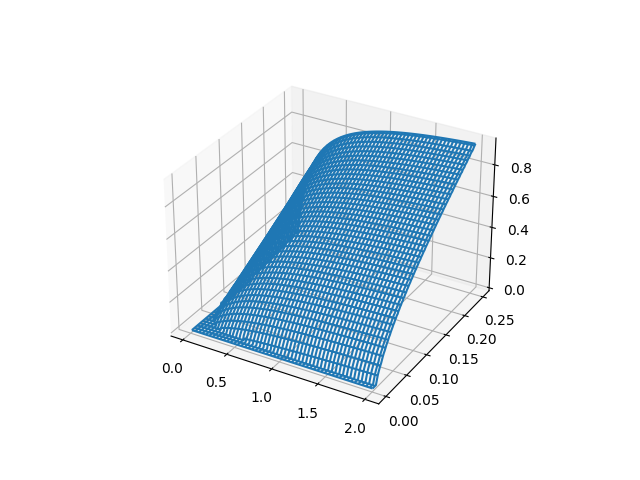

In [32]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import time
%matplotlib widget
theta_map = io.loadmat("../../beta_5.mat")
[print(key) for key in theta_map.keys()]
penetration = theta_map["penetration_num"][0]
terrain_radius = theta_map["terrain_radius_num"][0]
theta = theta_map["fitted_results"]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X , Y = np.meshgrid(terrain_radius , penetration)
interp = interpolate.RegularGridInterpolator((penetration, terrain_radius) , theta, method="linear")
large_tr_interp = interpolate.interp1d(penetration , theta[:,-1])
interp_values = []
ax.plot_wireframe(X , Y,theta )
ts = time.time()
it = 0
for pen in np.linspace(penetration[0] , penetration[-1] , 10):
    for tr in np.linspace(terrain_radius[0] ,3 , 10):
        if tr < terrain_radius[-1]:
            interp_values.append(interp((pen , tr)))
        else:
            interp_values.append(large_tr_interp(pen))
        #ax.plot(tr, pen , interp_values[-1], "r*")
        it += 1
print(f"{(time.time() - ts)*1000/it:.3f}ms per hit\n")
# angle_interpolator = interpolate.RegularGridInterpolator(
#         (theta_map["penetration_num"], theta_map["terrain_radius_num"]),
#         theta_map["fitted_results"])
